In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import mean_squared_error
import seaborn as sns
import warnings
from scipy.stats import chi2
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
df = pd.read_csv('./Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df['mainroad'] = df['mainroad'].replace({'yes':1,'no':0}).astype(int)
df['guestroom'] = df['guestroom'].replace({'yes':1,'no':0}).astype(int)
df['basement'] = df['basement'].replace({'yes':1,'no':0}).astype(int)
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes':1,'no':0}).astype(int)
df['airconditioning'] = df['airconditioning'].replace({'yes':1,'no':0}).astype(int)
df['prefarea'] = df['prefarea'].replace({'yes':1,'no':0}).astype(int)
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished':2,'semi-furnished':1, 'unfurnished':0 }).astype(int)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
df_bersih = df.copy()

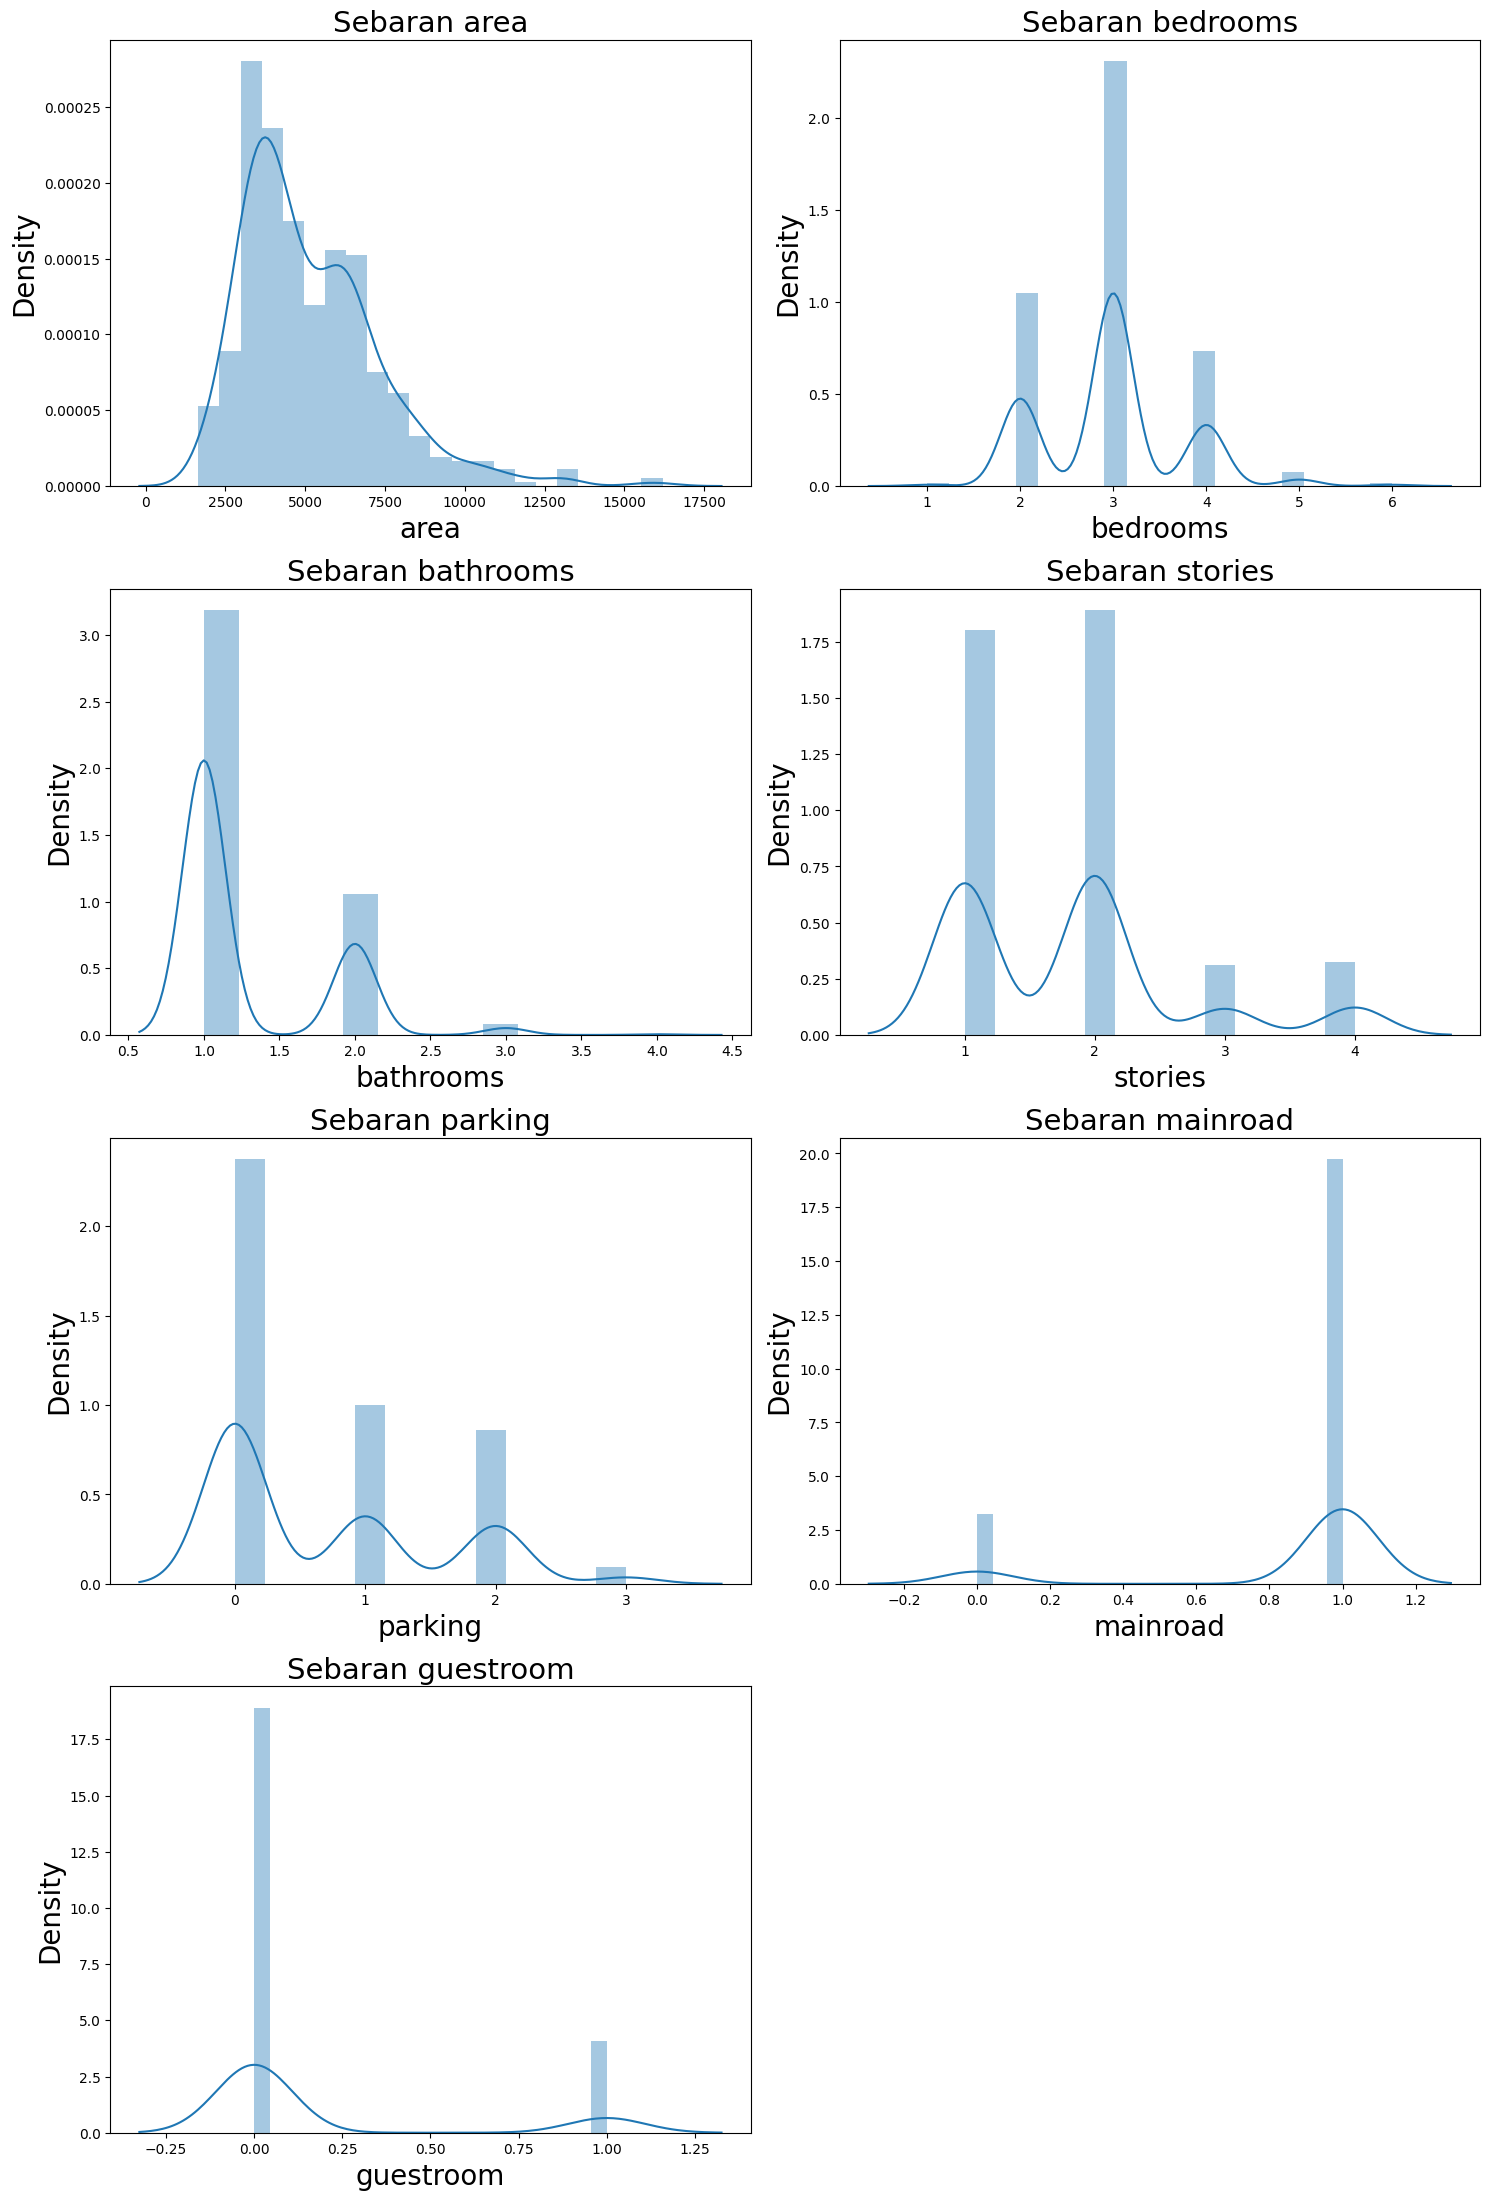

In [ ]:
def distplot(x,fig):
    plt.subplot(7,2,fig)
    sns.distplot(df[x])
    plt.title('Sebaran '+x,fontsize=21)
    plt.ylabel('Density',fontsize=20)
    plt.xlabel(x,fontsize=20)

plt.figure(figsize=(15,38))

distplot('area', 1)
distplot('bedrooms', 2)
distplot('bathrooms', 3)
distplot('stories', 4)
distplot('parking',5)
distplot('mainroad', 6)
distplot('guestroom', 7)


plt.tight_layout()

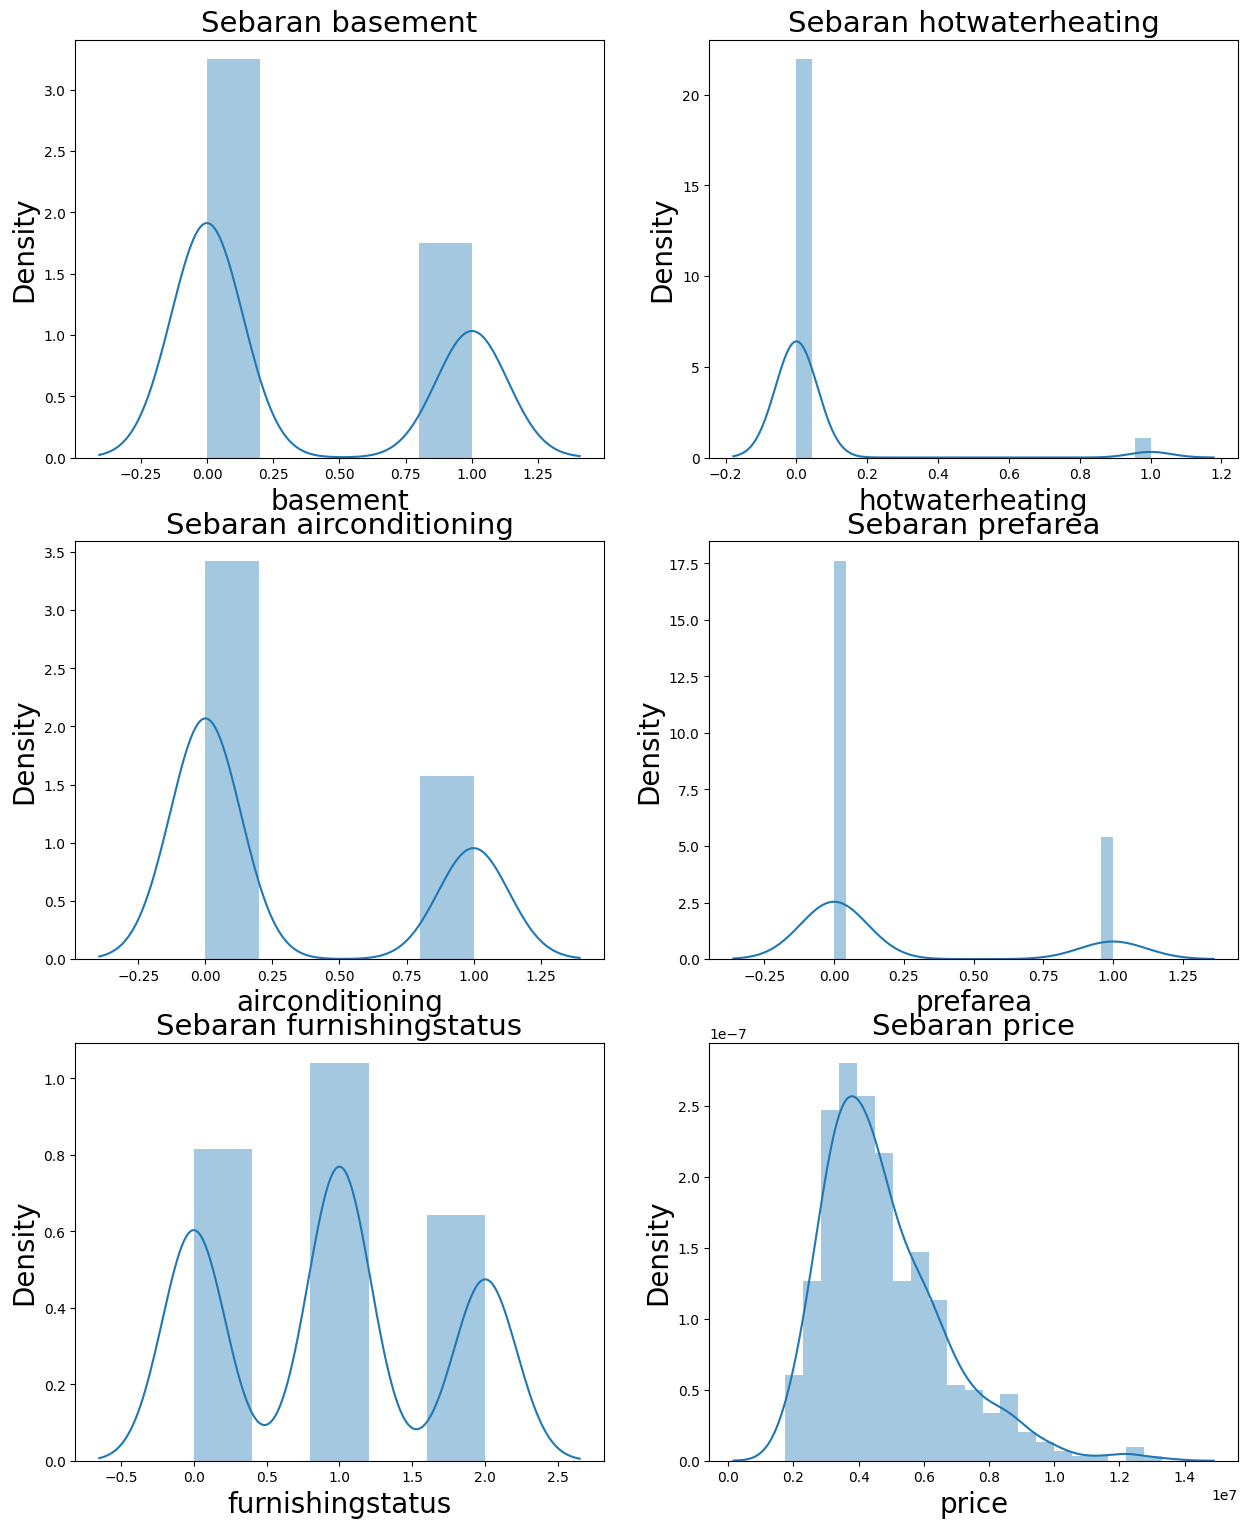

In [ ]:
def distplot1(x,fig):
    plt.subplot(6,2,fig)
    sns.distplot(df[x])
    plt.title('Sebaran '+x,fontsize=21)
    plt.ylabel('Density',fontsize=20)
    plt.xlabel(x,fontsize=20)

plt.figure(figsize=(15,38))
distplot1('basement', 1)
distplot1('hotwaterheating', 2)
distplot1('airconditioning',3)
distplot1('prefarea',4)
distplot1('furnishingstatus',5)
distplot1('price',6)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_bersih), columns=df_bersih.columns)


In [ ]:
df_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0


In [ ]:
df_mean = df_scaled.mean()
df_cov = df_scaled.cov()

In [ ]:
df_scaled.shape[1]

13

In [ ]:
def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mean, inv_cov)
    mahal = np.dot(left_term, x_minus_mean.T)
    return mahal.diagonal()

df_scaled['mahalanobis'] = mahalanobis_distance(df_scaled.values, df_mean.values, df_cov.values)

In [ ]:
df_scaled['mahalanobis']

0      34.023183
1      39.996270
2      34.309718
3      27.732544
4      33.530709
         ...    
540    14.578811
541     8.512673
542     5.221873
543    12.533084
544     5.672782
Name: mahalanobis, Length: 545, dtype: float64

In [ ]:
alpha = 0.05  # Nilai alpha untuk menentukan ambang batas outlier
df_scaled['chi_squared'] = chi2.ppf(1 - alpha, df_scaled.shape[1]-1)  # Hitung nilai kritis Chi-squared

In [ ]:
df_scaled.shape[1]

15

In [ ]:
df_scaled['chi_squared']

0      22.362032
1      22.362032
2      22.362032
3      22.362032
4      22.362032
         ...    
540    22.362032
541    22.362032
542    22.362032
543    22.362032
544    22.362032
Name: chi_squared, Length: 545, dtype: float64

In [ ]:
outlier_indices = df_scaled[df_scaled['mahalanobis'] > df_scaled['chi_squared']].index

df_no_outliers = df_scaled.drop(outlier_indices)


In [ ]:
outlier_indices22 = df_scaled[df_scaled['mahalanobis'] > df_scaled['chi_squared']]
outlier_indices22

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mahalanobis,chi_squared
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0,34.023183,22.362032
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0,39.996270,22.362032
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5,34.309718,22.362032
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0,27.732544,22.362032
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0,33.530709,22.362032
5,0.787879,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.5,29.785700,22.362032
7,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,60.276880,22.362032
9,0.696970,0.281787,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,24.300333,22.362032
10,0.696970,0.793814,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,1.0,24.716353,22.362032
11,0.686667,0.298969,0.6,0.666667,0.333333,1.0,1.0,1.0,1.0,0.0,0.666667,0.0,0.5,39.127931,22.362032


In [ ]:
outlier_indices22.shape

(57, 15)

In [ ]:
df_bersih = df_no_outliers.drop(['mahalanobis','chi_squared'],axis=1)

In [ ]:
df_bersih

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,0.727273,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
8,0.703030,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
12,0.654545,0.336770,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.5
14,0.648485,0.422680,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5
16,0.636364,0.340206,0.6,0.333333,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


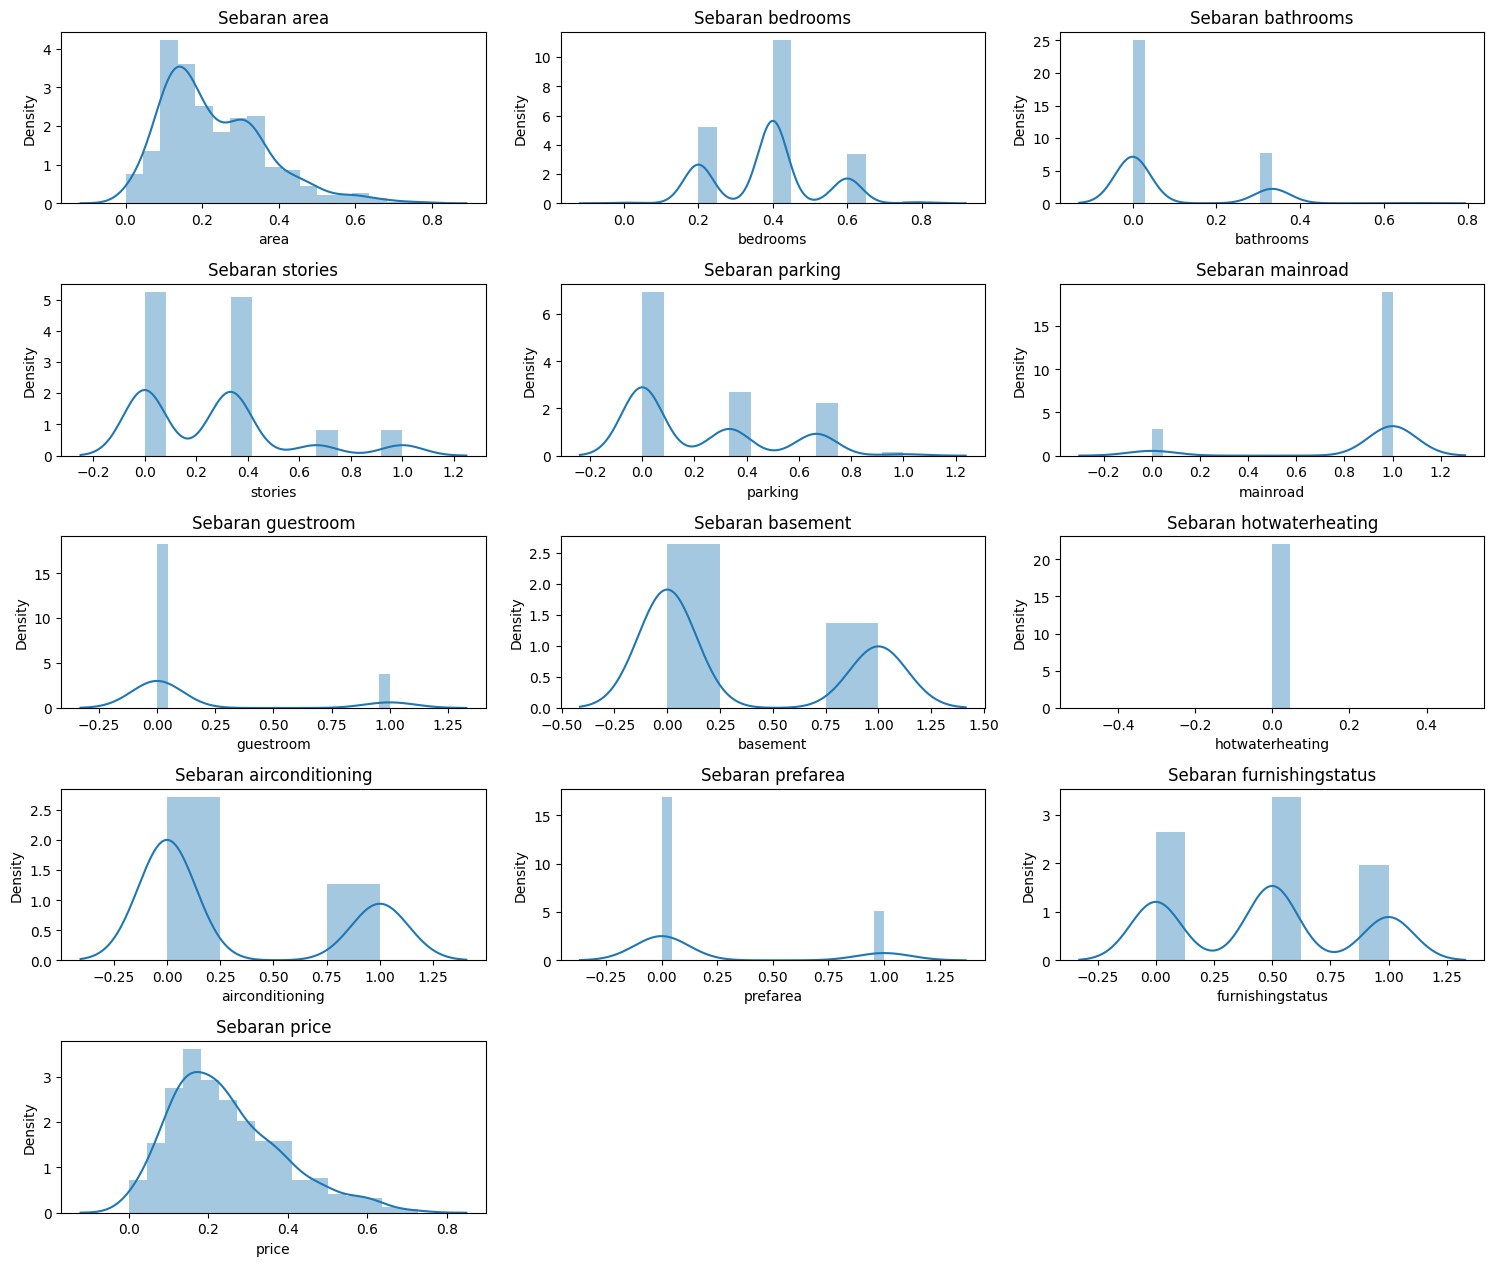

In [ ]:
def distplot(x,fig):
    plt.subplot(12,3,fig)
    #plt.scatter(df[x],bins)
    sns.distplot(df_bersih[x])
    #sns.boxplot(df[x])
    #plt.scatter(df[x],df['price'])
    plt.title('Sebaran '+x)
    plt.ylabel('Density')
    plt.xlabel(x)

plt.figure(figsize=(15,30))

distplot('area', 1)
distplot('bedrooms', 2)
distplot('bathrooms', 3)
distplot('stories', 4)
distplot('parking',5)
distplot('mainroad', 6)
distplot('guestroom', 7)
distplot('basement', 8)
distplot('hotwaterheating', 9)
distplot('airconditioning',10)
distplot('prefarea',11)
distplot('furnishingstatus',12)
distplot('price',13)

plt.tight_layout()

In [ ]:
df_bersih.shape

(488, 13)

In [ ]:
#df_bersih.to_csv('data_clean2.csv', index=False)
#files.download('data_clean2.csv')